In [4]:
import numpy as np

import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd

In [5]:
!wget -q --no-check-certificate https://astrostatistics.psu.edu/datasets/censor.dat

In [6]:
df = pd.read_csv('censor.dat', delim_whitespace=True)
df

,Star,Type,Teff,Ind_Be,logN_Be,sig_Be,Ind_Li,logN_Li
0,BD-103166,1,5320,1,0.50,NaN,1,NaN
1,HD_6434,1,5835,1,1.08,0.10,0,0.80
2,HD_9826,1,6212,1,1.05,0.13,1,2.55
3,HD_10647,1,6143,1,1.19,0.10,1,2.80
4,HD_10697,1,5641,1,1.31,0.13,1,1.96
...,...,...,...,...,...,...,...,...
63,HD_85117,2,6167,1,1.11,0.11,1,2.64
64,HD_189567,2,5765,1,1.06,0.10,0,0.82
65,HD_192310,2,5069,0,0.60,NaN,0,0.20
66,HD_211415,2,5890,1,1.12,0.10,1,1.92


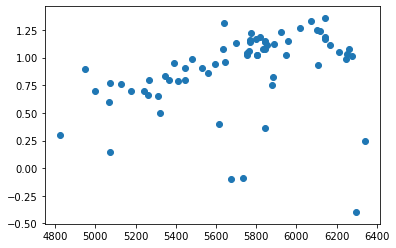

In [7]:
plt.scatter(df.Teff, df.logN_Be)

In [8]:
# Set up model parameters
linear_model = pm.Model()

with linear_model:
    b = pm.Normal('intercept', mu=0, sd=10)
    m = pm.Normal('slope', mu=0, sd=10)
    σ = pm.HalfNormal('noise_sd', sd=10)
    
    μ = b + m * df.Teff
    
    Y_obs = pm.Normal(df.logN_Be.name , mu=μ , sd=σ , observed=df.logN_Be)

In [ ]:
with linear_model:
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [noise_sd, slope, intercept]
Sampling chain 1, 0 divergences:  70%|███████   | 3860/5500 [14:11<10:14,  2.67it/s]

In [ ]:
pm.traceplot(trace);